In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
from scipy import stats
from math import exp
import processes.foundation as fd
import processes.fitModel as fM
import processes.histogramAction as hA
from math import exp, sqrt, pi, erfc
from lmfit import Model
from scipy.fft import fft, fftfreq, ifft

In [4]:
run_list = [x for x in range(8662,8670)]

In [91]:
t1_data = fd.get_t1_data(8662, 'Card1')
wf = t1_data[0]["waveform"]["values"].nda[1]

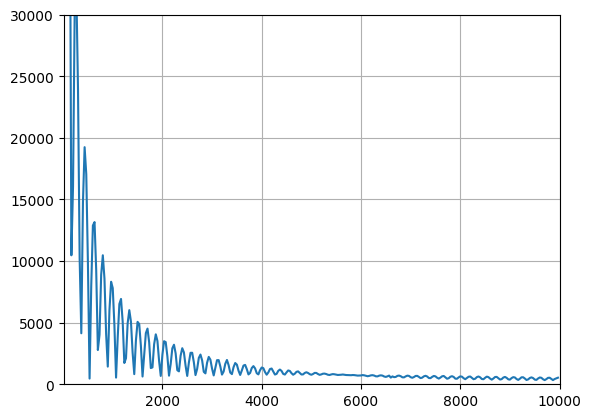

In [97]:
N = 600

# sample spacing

T = 1.0 / 20000.0

wf = t1_data[0]["waveform"]["values"].nda[1]

yf = fft(wf)

xf = fftfreq(N, T)[:N//2]

import matplotlib.pyplot as plt

plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.xlim(10,10000)
plt.ylim(0,30000)

plt.grid()

plt.show()

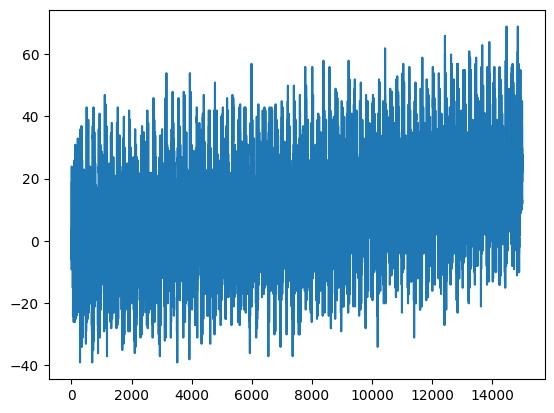

In [94]:
wf = wf - np.mean(wf[0:100])
plt.plot(wf[0:15000])

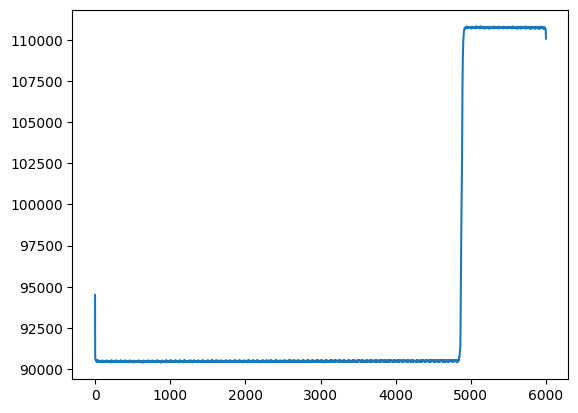

In [109]:
yback = ifft(yf[0:6000])
plt.plot(yback)

In [110]:
noise = []

In [111]:

for i in range(5,14):
    wf = t1_data[0]["waveform"]["values"].nda[i]
    yf = fft(wf)
    yback = ifft(yf[0:6000])
    wf = wf-np.mean(wf[1000:1100])
    c = 0.0408625
    m = -0.16892
    hold = wf[1000:40000]*c + m
    noise.append(hold)


In [112]:
noise = list(np.concatenate(noise).flat)

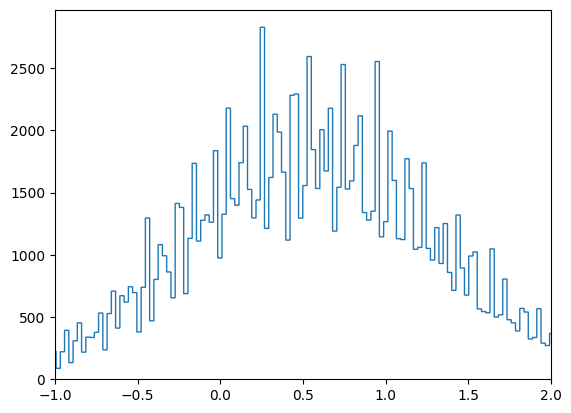

In [117]:
plt.hist(noise, histtype="step", bins = 100000)
plt.xlim(-1, 2)
plt.show()

In [23]:
print(wf)
print(wf2)

[25986 25990 25986 ... 38163 38154 38156]
[-9.130000e+00 -5.130000e+00 -9.130000e+00 ...  1.216787e+04  1.215887e+04
  1.216087e+04]


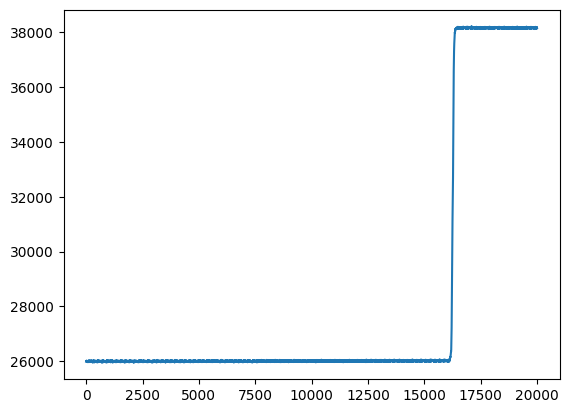

In [22]:
plt.plot(wf)

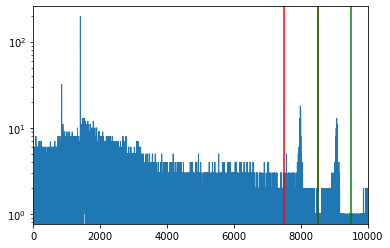

[7984.0757, 9068.322]


In [59]:
counts, bins, bars = plt.hist(Ge_data["trapEmax"], histtype='step', bins=160000)
adc = []
for ranges in peaks:
    peak_range = hA.find_nearest_bin(bins, ranges[0]), hA.find_nearest_bin(bins, ranges[1])
    peak_idx = np.argmax(counts[peak_range[0]:peak_range[1]]) + peak_range[0]
    peak = bins[peak_idx]
    adc.append(peak)

plt.yscale('log')
plt.xlim(0, 10000)

plt.axvline(x=peak1_min, color='r')
plt.axvline(x=peak1_max, color='r')
plt.axvline(x=peak2_min, color='green')
plt.axvline(x=peak2_max, color='g')
plt.show()
print(adc)

In [60]:
bins

array([-3042.5647, -3042.3792, -3042.1934, ..., 26662.453 , 26662.639 ,
       26662.824 ], dtype=float32)

In [61]:
slope, intercept, r_value, p_value, std_err = stats.linregress(adc,energy)
print(slope)
print(intercept)

0.1484902075488947
-13.557091595411293


In [62]:
energy = [x*slope + intercept for x in Ge_data["trapEmax"]]

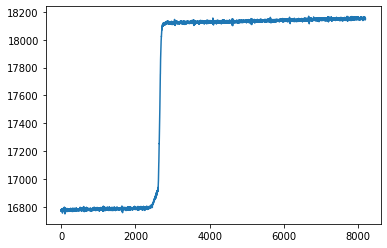

In [11]:
plt.plot(t1_data[0]['waveform']["values"].nda[1])

In [63]:
baseline = [x*slope + intercept for x in t1_data[0]['waveform']["values"].nda[1][0:500]]

In [64]:
baseline_Average = baseline - np.mean(baseline)

In [67]:
rms = np.sqrt(np.mean(baseline_Average**2))

In [68]:
rms

0.8154394334382299

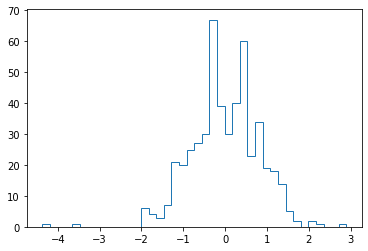

In [70]:
plt.hist(baseline_Average, histtype="step", bins=40)
plt.show()